<a href="https://colab.research.google.com/github/pedddrym/ML_housing_prices/blob/main/HousingPricesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Housing.csv"

# Load the latest version
housingprices = kagglehub.load_dataset(
  adapter=KaggleDatasetAdapter.PANDAS,
  handle="yasserh/housing-prices-dataset",
  path=file_path,
)

print("First 5 records:")
housingprices.head()

/tmp/ipython-input-43-4095116127.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  housingprices = kagglehub.load_dataset(


First 5 records:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Preço Imobiliário
Um projeto simples com o objetivo de **compreender o dataset** antes de aplicar as técnicas de pré-processamento de dados e codificação, com um foco em análise de _variáveis categóricas e quantitativas._


In [ ]:
# Identificação da variável-alvo
housingprices.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df = housingprices.copy()
housingprices.head(15)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


**Pelo nome do dataset e com base nas colunas apresentadas, fica claro que a nossa variável-alvo é o "price", ou preço, do imóvel.**

In [ ]:
# Traduzindo as colunas e informando a unidade
df.columns = [
    'Preço (dols)',         # price
    'Área_Casa (m2)',       # area
    'Qtd-Quartos',          # bedrooms
    'Qtd-Banheiros',        # bathrooms
    'Andares',              # stories
    'naRuaPrincipal',       # mainroad
    'Quarto-Hóspedes',      # guestroom
    'Porão',                # basement
    'Aquecimento-Água',     # hotwaterheating
    'Ar-Condicionado',      # arconditioning
    'Vagas-Estacionar',     # parking
    'Área-Preferencial',    # prefarea
    'Mobília'               # furnishingstatus
]

In [ ]:
# Traduzindo os valores
df['naRuaPrincipal'] = df['naRuaPrincipal'].replace({'yes': 'Sim', 'no': 'Não'})
df['Quarto-Hóspedes'] = df['Quarto-Hóspedes'].replace({'yes': 'Sim', 'no': 'Não'})
df['Porão'] = df['Porão'].replace({'yes': 'Sim', 'no': 'Não'})
df['Aquecimento-Água'] = df['Aquecimento-Água'].replace({'yes': 'Sim', 'no': 'Não'})
df['Ar-Condicionado'] = df['Ar-Condicionado'].replace({'yes': 'Sim', 'no': 'Não'})
df['Área-Preferencial'] = df['Área-Preferencial'].replace({'yes': 'Sim', 'no': 'Não'})
df['Mobília'] = df['Mobília'].replace({
    'furnished': 'Mobiliado',
    'semi-furnished': 'Semi-mobiliado',
    'unfurnished': 'Desmobiliado'
})

In [ ]:
# Dataset traduzido
df.head(15)

,Preço (dols),Área_Casa (m2),Qtd-Quartos,Qtd-Banheiros,Andares,naRuaPrincipal,Quarto-Hóspedes,Porão,Aquecimento-Água,Ar-Condicionado,Vagas-Estacionar,Área-Preferencial,Mobília
0,13300000,7420,4,2,3,Sim,Não,Não,Não,Sim,2,Sim,Mobiliado
1,12250000,8960,4,4,4,Sim,Não,Não,Não,Sim,3,Não,Mobiliado
2,12250000,9960,3,2,2,Sim,Não,Sim,Não,Não,2,Sim,Semi-mobiliado
3,12215000,7500,4,2,2,Sim,Não,Sim,Não,Sim,3,Sim,Mobiliado
4,11410000,7420,4,1,2,Sim,Sim,Sim,Não,Sim,2,Não,Mobiliado
5,10850000,7500,3,3,1,Sim,Não,Sim,Não,Sim,2,Sim,Semi-mobiliado
6,10150000,8580,4,3,4,Sim,Não,Não,Não,Sim,2,Sim,Semi-mobiliado
7,10150000,16200,5,3,2,Sim,Não,Não,Não,Não,0,Não,Desmobiliado
8,9870000,8100,4,1,2,Sim,Sim,Sim,Não,Sim,2,Sim,Mobiliado
9,9800000,5750,3,2,4,Sim,Sim,Não,Não,Sim,1,Sim,Desmobiliado


In [ ]:
# Verificando informações sobre cada atributo, qtd de dados faltantes e tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Preço (dols)       545 non-null    int64 
 1   Área_Casa (m2)     545 non-null    int64 
 2   Qtd-Quartos        545 non-null    int64 
 3   Qtd-Banheiros      545 non-null    int64 
 4   Andares            545 non-null    int64 
 5   naRuaPrincipal     545 non-null    object
 6   Quarto-Hóspedes    545 non-null    object
 7   Porão              545 non-null    object
 8   Aquecimento-Água   545 non-null    object
 9   Ar-Condicionado    545 non-null    object
 10  Vagas-Estacionar   545 non-null    int64 
 11  Área-Preferencial  545 non-null    object
 12  Mobília            545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Vemos que o dataset não possui valores faltantes, logo, o tratamento de recuperação de valores não será necessário



In [ ]:
df.columns

Index(['Preço (dols)', 'Área_Casa (m2)', 'Qtd-Quartos', 'Qtd-Banheiros',
       'Andares', 'naRuaPrincipal', 'Quarto-Hóspedes', 'Porão',
       'Aquecimento-Água', 'Ar-Condicionado', 'Vagas-Estacionar',
       'Área-Preferencial', 'Mobília'],
      dtype='object')

In [ ]:
# Criando uma nova tabela para armazenar proporções de variáveis
relacoes_variaveis = pd.DataFrame()

# Alterando os valores de "Sim" e "Não" do atributo "Quarto-Hóspedes" para 1 e 0 em uma variável distinta
quarto_hospedes = df['Quarto-Hóspedes'].map({'Sim': 1, 'Não': 0})

# Qtd de determinado cômodo / total de cômodos = densidade de determinado cômodo
relacoes_variaveis['densidade_quartos'] = df['Qtd-Quartos'] / (df['Qtd-Quartos'] + df['Qtd-Banheiros'] + quarto_hospedes)
relacoes_variaveis['densidade_banheiros'] = df['Qtd-Banheiros'] / (df['Qtd-Quartos'] + df['Qtd-Banheiros'] + quarto_hospedes)
relacoes_variaveis['densidade_hospedes'] = quarto_hospedes / (df['Qtd-Quartos'] + df['Qtd-Banheiros'] + quarto_hospedes)

# Toda casa, de praxe, possui 1 banheiro social, ou seja, que todos utilizam -- logo, se houver mais de um banheiro, há suítes
relacoes_variaveis['densidade_suítes'] = df['Qtd-Banheiros'] - 1 / (df['Qtd-Quartos'] + df['Qtd-Banheiros'] + quarto_hospedes)

relacoes_variaveis.head(11)

,densidade_quartos,densidade_banheiros,densidade_hospedes,densidade_suítes
0,0.666667,0.333333,0.000000,1.833333
1,0.500000,0.500000,0.000000,3.875000
2,0.600000,0.400000,0.000000,1.800000
3,0.666667,0.333333,0.000000,1.833333
4,0.666667,0.166667,0.166667,0.833333
5,0.500000,0.500000,0.000000,2.833333
6,0.571429,0.428571,0.000000,2.857143
7,0.625000,0.375000,0.000000,2.875000
8,0.666667,0.166667,0.166667,0.833333
9,0.500000,0.333333,0.166667,1.833333


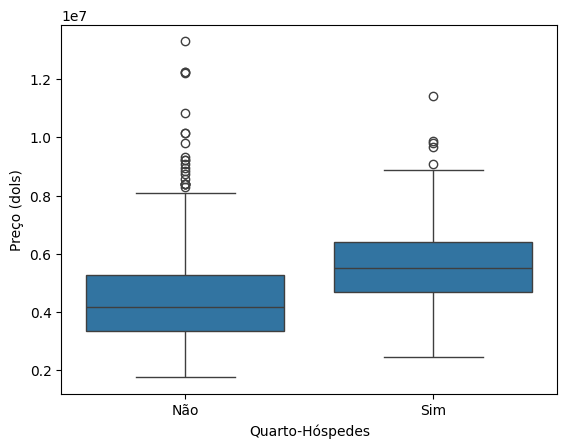

In [ ]:
sns.boxplot(x='Quarto-Hóspedes',y='Preço (dols)',data=df)
plt.show()

> Os boxplots para o preço da casa com base na presença de um quarto de hóspede estão pouco separados, é possível ver que seus valores são muito próximos, logo há uma certa relação entre os dois.

Vamos, então, checar os boxplots para as outras variáveis categóricas e analisar se há uma relação entre elas e o preço do imóvel:

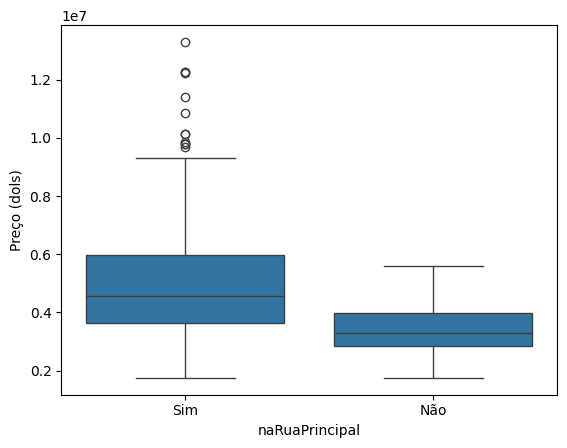

In [ ]:
sns.boxplot(x='naRuaPrincipal',y='Preço (dols)',data=df)
plt.show()

> Aqui podemos ver que há uma relação entre a casa estar na rua principal e o seu preço, onde aumenta caso esteja e diminui caso não.

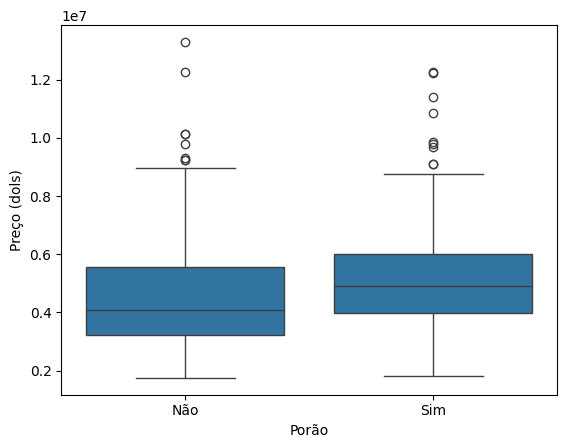

In [ ]:
sns.boxplot(x='Porão',y='Preço (dols)',data=df)
plt.show()

Aqui recai numa situação semelhante ao do preço com base na presença do quarto de hóspedes, só que aqui chega a ser pior, já que muitos valores são semelhantes e recaem nas duas categorias. Logo a relação também é muito pouca.

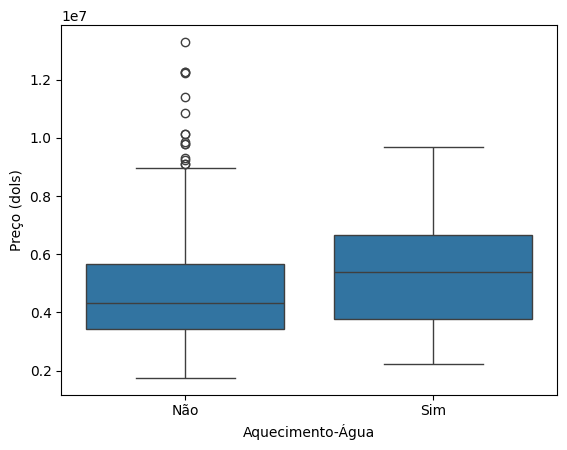

In [ ]:
sns.boxplot(x='Aquecimento-Água',y='Preço (dols)',data=df)
plt.show()

Mesma situação.

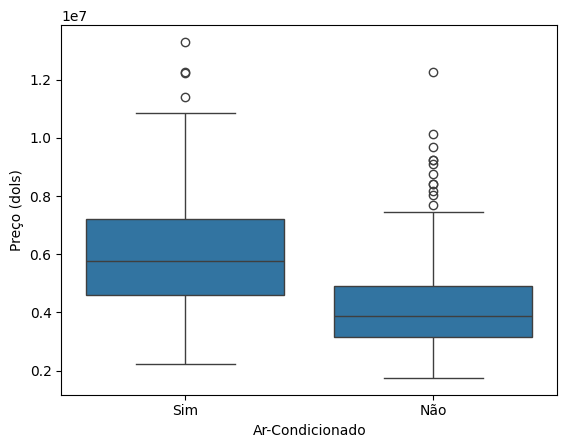

In [ ]:
sns.boxplot(x='Ar-Condicionado',y='Preço (dols)',data=df)
plt.show()

OPA! Agora, sim, encontramos uma variável que faz diferença no preço da casa! É possível ver que, *por mais que hajam valores iguais*, são poucos, e **suas medianas estão distoantes uma da outra**, um indício de que **há, sim, uma relação** entre a presença de Ar-Condicionado na casa com o preço da mesma!

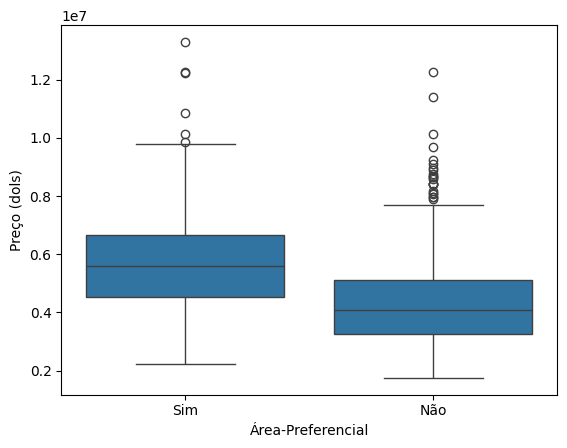

In [ ]:
sns.boxplot(x='Área-Preferencial',y='Preço (dols)',data=df)
plt.show()

> Este da área preferencial recai na mesma situação da relação entre estar na rua principal e o preço da casa. Aqui, vemos que há uma certa quantidade de valores iguais para o valor binário, mas **suas medianas têm certa distância uma da outra**, indicando uma relação.

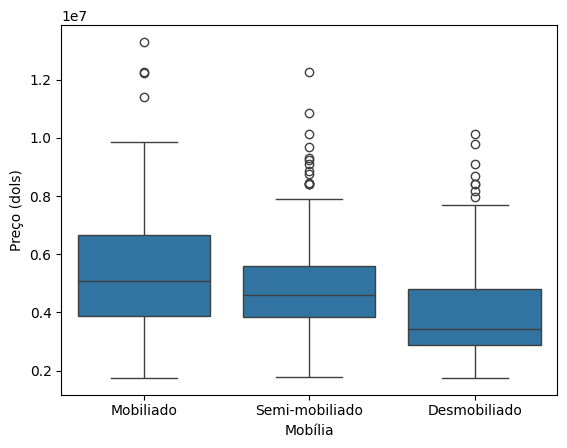

In [ ]:
sns.boxplot(x='Mobília',y='Preço (dols)',data=df)
plt.show()

Este, infelizmente, há pouca relação -- o máximo que temos é a diferença entre Mobiliado e Semi-mobiliado com o Desmobiliado, onde é possível ver uma distância entre as medianas. Ainda assim, não é uma relação tão impactante quanto a do ar-condicionado, por exemplo.

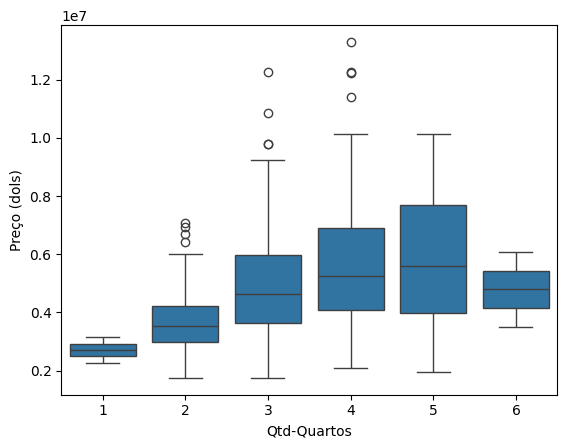

In [ ]:
sns.boxplot(x='Qtd-Quartos',y='Preço (dols)',data=df)
plt.show()

Este aqui também podemos ver uma relação visível, na qual a faixa de preço tende a aumentar dependendo da quantidade de quartos e, incrivelmente, com 6 quartos, o preço diminui!

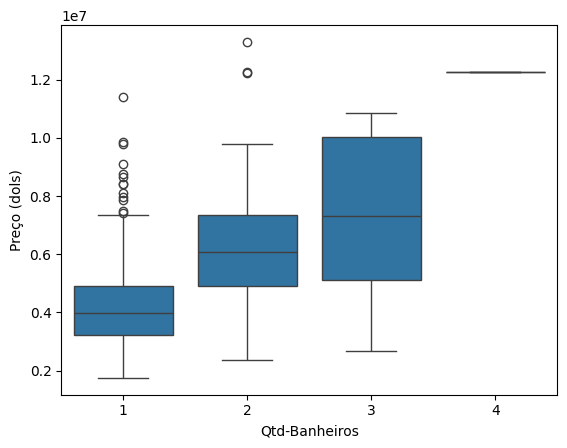

In [ ]:
sns.boxplot(x='Qtd-Banheiros',y='Preço (dols)',data=df)
plt.show()

Outro caso com uma relação bem visível!

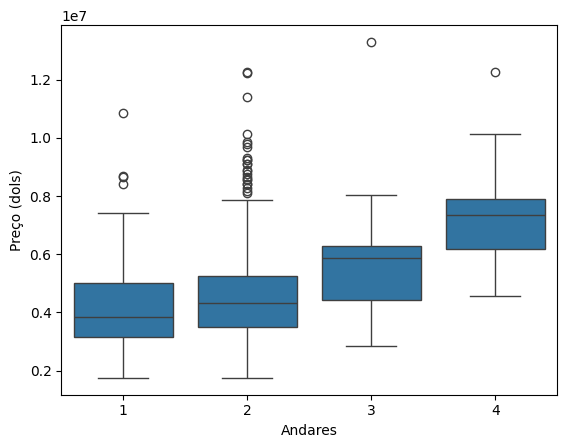

In [ ]:
sns.boxplot(x='Andares',y='Preço (dols)',data=df)
plt.show()

Já para este, vemos que a relação também é forte, mas não tanto para quando temos 1 ou 2 andares, ela começa a se mostrar forte mesmo de 2 pra frente.

In [ ]:
# Calculando a média, mediana e moda de diferentes agrupamentos
display(df[['Qtd-Quartos','Andares']].groupby('Andares').mean(), df[['Qtd-Quartos','Andares']].groupby('Andares').median())

,Qtd-Quartos
Andares,
1,2.519824
2,3.281513
3,3.230769
4,3.341463


,Qtd-Quartos
Andares,
1,2.0
2,3.0
3,3.0
4,3.0


In [ ]:
display(df[['Qtd-Banheiros','Andares']].groupby('Andares').mean(), df[['Qtd-Banheiros','Andares']].groupby('Andares').median())

,Qtd-Banheiros
Andares,
1,1.136564
2,1.331933
3,1.358974
4,1.780488


,Qtd-Banheiros
Andares,
1,1.0
2,1.0
3,1.0
4,2.0


In [ ]:
df.columns

Index(['Preço (dols)', 'Área_Casa (m2)', 'Qtd-Quartos', 'Qtd-Banheiros',
       'Andares', 'naRuaPrincipal', 'Quarto-Hóspedes', 'Porão',
       'Aquecimento-Água', 'Ar-Condicionado', 'Vagas-Estacionar',
       'Área-Preferencial', 'Mobília'],
      dtype='object')

In [ ]:
housing = df.copy()
housing['Ar-Condicionado'] = housing['Ar-Condicionado'].map({'Sim':1,'Não':0})
housing['naRuaPrincipal'] = housing['naRuaPrincipal'].map({'Sim':1,'Não':0})
housing['Quarto-Hóspedes'] = housing['Quarto-Hóspedes'].map({'Sim':1,'Não':0})
housing['Porão'] = housing['Porão'].map({'Sim':1,'Não':0})
housing['Aquecimento-Água'] = housing['Aquecimento-Água'].map({'Sim':1,'Não':0})
housing['Área-Preferencial'] = housing['Área-Preferencial'].map({'Sim':1,'Não':0})
housing['Mobília'] = housing['Mobília'].map({'Mobiliado':2,'Semi-mobiliado':1,'Desmobiliado':0})

In [ ]:
# Separando as variáveis qualitativas das quantitativas
target = housing['Preço (dols)']
cat_df = housing[['naRuaPrincipal','Quarto-Hóspedes','Porão','Aquecimento-Água','Ar-Condicionado','Área-Preferencial','Mobília']]
num_df = housing[['Área_Casa (m2)','Qtd-Quartos','Qtd-Banheiros','Andares','Vagas-Estacionar']]

In [ ]:
# Calculando a correlação das variáveis quantitativas com a variável alvo (preço)
corr_results = []
for variable in num_df.columns:
  correlation = num_df[variable].corr(target)
  corr_results.append((variable, correlation*100))

corr_table = pd.DataFrame(corr_results, columns=['Variável', 'Correlação'])
corr_table = corr_table.sort_values(by='Correlação', ascending=False)
corr_table

,Variável,Correlação
0,Área_Casa (m2),53.599735
2,Qtd-Banheiros,51.754534
3,Andares,42.071237
4,Vagas-Estacionar,38.439365
1,Qtd-Quartos,36.649403


In [ ]:
# Calculando o qui-quadrado das variáveis qualitativas com a variável alvo (preço)
chi2_results = []
for variable in cat_df.columns:
  contingency_table = pd.crosstab(cat_df[variable], target)
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)
  total_observations = housing[variable].count()
  contingency_coefficient = chi2 / (chi2 + total_observations)
  chi2_results.append((variable, contingency_coefficient*100))

chi2_table = pd.DataFrame(chi2_results, columns=['Variável', 'Qui²_Coef.-Conting.'])
chi2_table = chi2_table.sort_values(by='Qui²_Coef.-Conting.', ascending=False)
chi2_table

,Variável,Qui²_Coef.-Conting.
6,Mobília,48.296595
1,Quarto-Hóspedes,35.678131
5,Área-Preferencial,34.940176
4,Ar-Condicionado,34.785247
2,Porão,32.685347
0,naRuaPrincipal,30.885113
3,Aquecimento-Água,30.145498


In [ ]:
# Tabela com todas as relações de forma ordenada
all_var = corr_results + chi2_results
all_var = pd.DataFrame(all_var, columns=['Variável', 'Coeficiente'])
all_var = all_var.sort_values(by='Coeficiente', ascending=False)
all_var

,Variável,Coeficiente
0,Área_Casa (m2),53.599735
2,Qtd-Banheiros,51.754534
11,Mobília,48.296595
3,Andares,42.071237
4,Vagas-Estacionar,38.439365
1,Qtd-Quartos,36.649403
6,Quarto-Hóspedes,35.678131
10,Área-Preferencial,34.940176
9,Ar-Condicionado,34.785247
7,Porão,32.685347


/tmp/ipython-input-70-2144803760.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variável', data=all_var, palette='viridis')


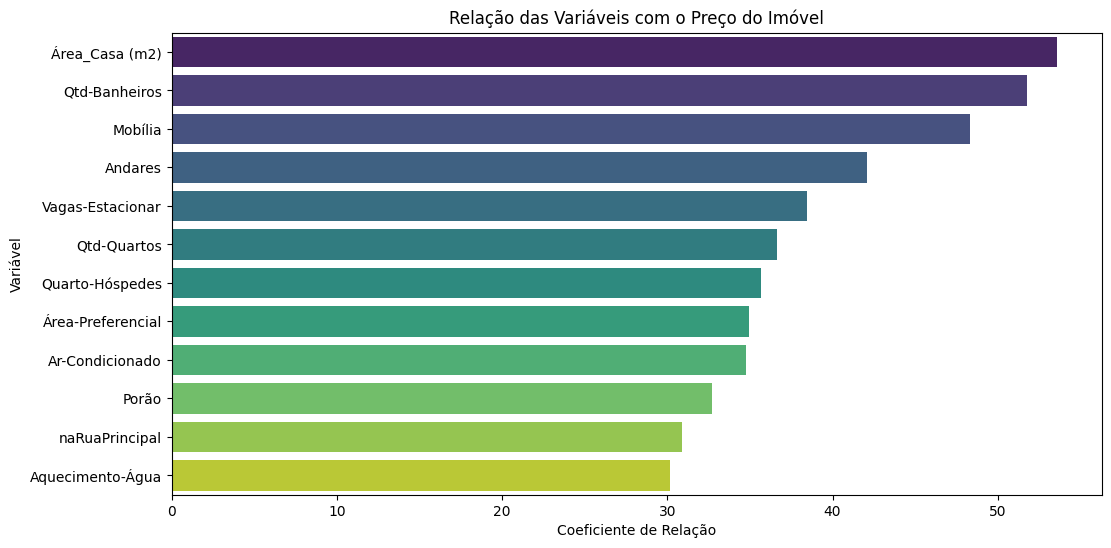

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Coeficiente', y='Variável', data=all_var, palette='viridis')
plt.title('Relação das Variáveis com o Preço do Imóvel')
plt.xlabel('Coeficiente de Relação')
plt.ylabel('Variável')
plt.show()

### Vemos que todas as variáveis possuem uma relação acima de 30% com a target, porém, usar todas indica um custo operacional maior.

### Vamos aplicar a Regressão Linear para as variáveis mais importantes e depois aplicar RL para todas e comparar o desempenho de ambos modelos.

In [ ]:
# Somente com as variáveis mais fortes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

top_features = all_var.loc[all_var['Coeficiente'] > 35, 'Variável'].tolist()

X = housing[top_features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_strong = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_strong}")
rmse_strong = mse_strong**0.5
print(f"Root Mean Squared Error: {rmse_strong}")

Mean Squared Error: 2171360794386.1855
Root Mean Squared Error: 1473553.7975880574


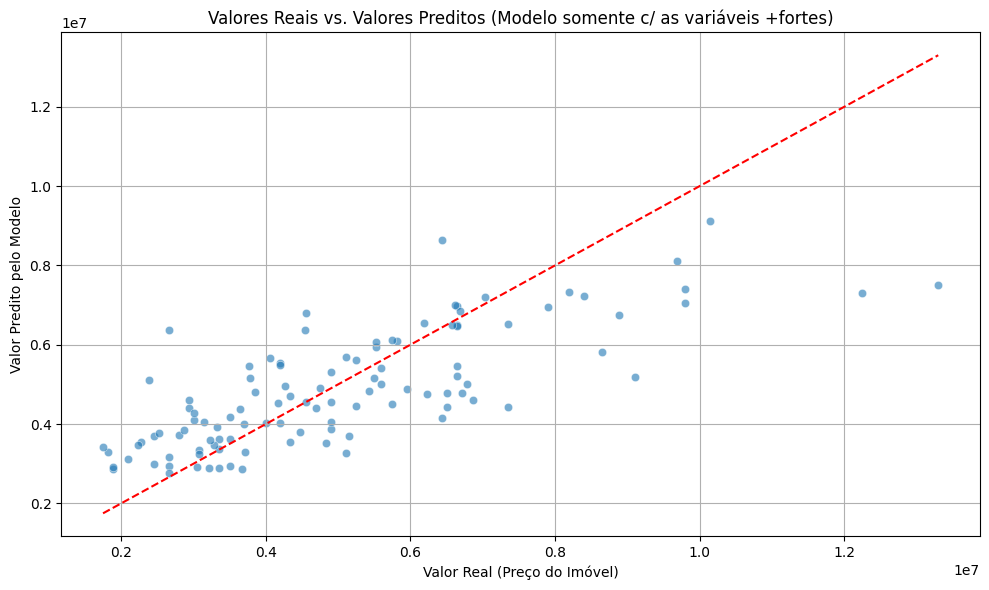

In [ ]:
# Supondo que você tenha esses vetores:
# y_test: valores reais
# y_pred: valores preditos pelo modelo

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Linha de referência: y = x (predito igual ao real)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Títulos e rótulos
plt.title('Valores Reais vs. Valores Preditos (Modelo somente c/ as variáveis +fortes)')
plt.xlabel('Valor Real (Preço do Imóvel)')
plt.ylabel('Valor Predito pelo Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Com todas as variáveis
X = housing.drop(columns=['Preço (dols)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse_all}")
rmse_all = mse_all**0.5
print(f"Root Mean Squared Error: {rmse_all}")

Mean Squared Error: 1771751116594.0352
Root Mean Squared Error: 1331071.4167895108


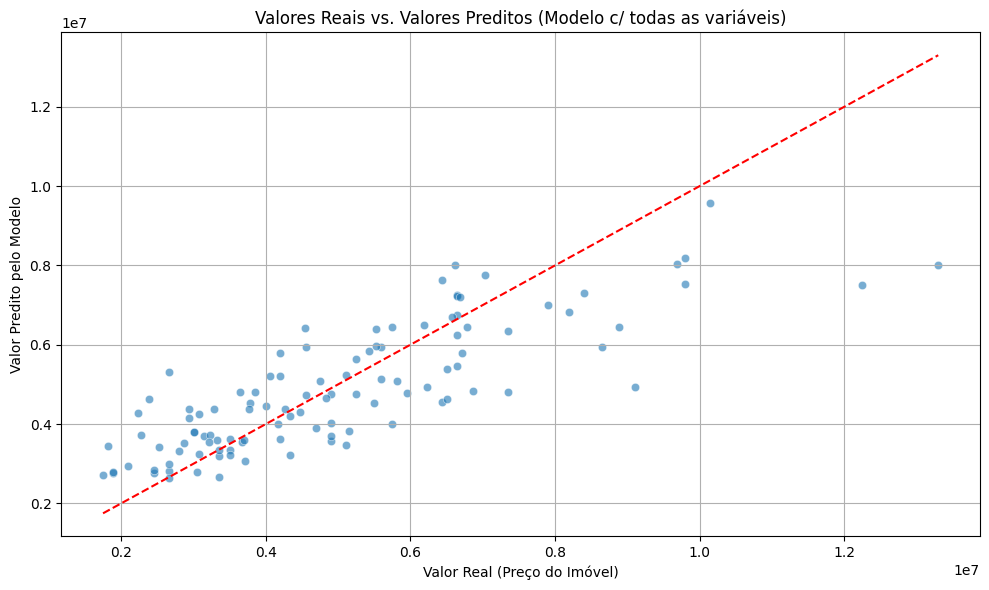

In [ ]:
# Supondo que você tenha esses vetores:
# y_test: valores reais
# y_pred: valores preditos pelo modelo

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Linha de referência: y = x (predito igual ao real)
max_val = max(max(y_test), max(y_pred))
min_val = min(min(y_test), min(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

# Títulos e rótulos
plt.title('Valores Reais vs. Valores Preditos (Modelo c/ todas as variáveis)')
plt.xlabel('Valor Real (Preço do Imóvel)')
plt.ylabel('Valor Predito pelo Modelo')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Melhoria:
upgrade_mse = (mse_all - mse_strong) / mse_all
upgrade_rmse = (rmse_all - rmse_strong) / rmse_all

print(f"Melhoria no MSE: {upgrade_mse*100:.2f}%")
print(f"Melhoria no RMSE: {upgrade_rmse*100:.2f}%")

Melhoria no MSE: -22.55%
Melhoria no RMSE: -10.70%
